In [1]:
from pose_format import Pose
from pose_format.pose_visualizer import PoseVisualizer, FastAndUglyPoseVisualizer
import numpy as np

In [10]:
path_pose = '../data/pose_files/SGB_FSS_skew_right.pose'
save_path = "../output/visualize_pose/"

## 📥 Loading Pose File for Visualization

In [11]:
def load_pose(pose_path: str) -> Pose:
    """Load pose file"""
    with open(pose_path, 'rb') as f:
        pose = Pose.read(f.read())
    print(f"✅ Loaded: {pose_path}")
    print(f"   Frames: {pose.body.data.shape[0]}")
    print(f"   FPS: {int(pose.body.fps)}")
    return pose



In [12]:

pose = load_pose(path_pose)

✅ Loaded: ../data/pose_files/SGB_FSS_skew_right.pose
   Frames: 165
   FPS: 30


## 1️⃣ Using CLI for Quick Visualization

In [ ]:
# Display pose as video
!visualize_pose -i "../data/pose_files/example.pose" -o "../output/visualize_pose/output_video.mp4"


0it [00:00, ?it/s]
1it [00:01,  1.79s/it]
3it [00:01,  1.90it/s]
5it [00:02,  3.36it/s]
6it [00:02,  4.05it/s]
7it [00:02,  4.76it/s]
8it [00:02,  5.31it/s]
9it [00:02,  5.82it/s]
11it [00:02,  6.89it/s]
12it [00:02,  7.24it/s]
13it [00:03,  7.54it/s]
14it [00:03,  7.94it/s]
16it [00:03,  8.77it/s]
18it [00:03,  9.80it/s]
20it [00:03, 10.10it/s]
22it [00:03, 10.69it/s]
24it [00:04,  6.71it/s]
25it [00:04,  6.42it/s]
26it [00:04,  6.87it/s]
28it [00:04,  7.85it/s]
30it [00:05,  7.09it/s]
31it [00:05,  7.23it/s]
32it [00:05,  7.68it/s]
33it [00:05,  8.08it/s]
35it [00:05,  8.96it/s]
37it [00:05,  9.69it/s]
39it [00:06,  9.01it/s]
40it [00:06,  9.11it/s]
42it [00:06,  9.08it/s]
43it [00:06,  8.92it/s]
44it [00:06,  8.94it/s]
45it [00:06,  8.67it/s]
46it [00:07,  8.24it/s]
47it [00:07,  8.35it/s]
48it [00:07,  8.46it/s]
50it [00:07,  8.74it/s]
51it [00:07,  8.44it/s]
52it [00:07,  8.53it/s]
53it [00:07,  8.50it/s]
54it [00:07,  8.59it/s]
55it [00:08,  8.32it/s]
56it [00:08,  7.92it/s]
57i

In [ ]:
# With normalization (for better display)
!visualize_pose -i "../data/pose_files/example.pose" -o "../output/visualize_pose/output_normalized.mp4" --normalize


0it [00:00, ?it/s]
1it [00:00,  2.18it/s]
2it [00:00,  3.93it/s]
4it [00:00,  6.51it/s]
5it [00:00,  7.16it/s]
7it [00:01,  8.48it/s]
9it [00:01,  9.33it/s]
10it [00:01,  8.31it/s]
11it [00:01,  8.17it/s]
12it [00:01,  7.39it/s]
14it [00:01,  8.53it/s]
16it [00:02,  9.27it/s]
17it [00:02,  8.62it/s]
18it [00:02,  8.31it/s]
20it [00:02,  8.99it/s]
21it [00:02,  9.13it/s]
23it [00:02,  9.96it/s]
25it [00:03, 10.28it/s]
27it [00:03, 10.28it/s]
29it [00:03,  7.65it/s]
30it [00:03,  7.72it/s]
32it [00:03,  8.32it/s]
33it [00:04,  8.37it/s]
35it [00:04,  8.86it/s]
36it [00:04,  8.51it/s]
37it [00:04,  8.61it/s]
38it [00:04,  8.62it/s]
39it [00:04,  8.27it/s]
40it [00:04,  8.34it/s]
41it [00:04,  8.72it/s]
43it [00:05,  9.45it/s]
45it [00:05,  9.96it/s]
46it [00:05,  9.93it/s]
48it [00:05, 10.07it/s]
50it [00:05, 10.16it/s]
52it [00:06, 10.20it/s]
54it [00:06, 10.42it/s]
56it [00:06, 10.38it/s]
58it [00:06, 10.53it/s]
60it [00:06, 10.46it/s]
62it [00:06, 10.60it/s]
64it [00:07, 10.52it/s]
66

## 2️⃣ Creating Video from Pose

In [13]:
def create_video_from_pose(pose: Pose, output_path: str, 
                            background_color: tuple = (255, 255, 255),
                            normalize: bool = True,
                            max_frames: int = None):
    """
    Create video from pose file
    
    Parameters:
    -----------
    pose : Pose
        The Pose object
    output_path : str
        Output video path
    background_color : tuple
        Background color (RGB)
    normalize : bool
        Normalize pose for better display
    max_frames : int, optional
        Maximum number of frames
    """
    # Copy for editing
    pose_copy = pose.copy()
    
    if normalize:
        # Ensure pose starts from (0,0) and fills the space
        pose_copy.focus()
    
    # Create visualizer
    visualizer = PoseVisualizer(pose_copy, thickness=2)
    
    # Generate frames
    frames = visualizer.draw(
        background_color=background_color,
        max_frames=max_frames
    )
    
    # Save as video
    visualizer.save_video(output_path, frames)
    
    print(f"✅ Video saved: {output_path}")



In [19]:

background_color = (255, 255, 255)  # white
create_video_from_pose(pose, save_path + "video_with_background_white.mp4", normalize=False, background_color=background_color)

133it [00:17,  7.61it/s]


✅ تم حفظ الفيديو: ../output/visualize_pose/video_with_background_white.mp4


In [14]:
background_color = (0, 0, 0)  # black
create_video_from_pose(pose, save_path + "video_with_background_black.mp4", normalize=True, background_color=background_color)

0it [00:00, ?it/s]WARNING:root:Video shape is not divisible by 2. Can not use H.264. Consider resizing to a divisible shape.
165it [00:22,  7.45it/s]


✅ Video saved: ../output/visualize_pose/video_with_background_black.mp4


## 3️⃣ Creating Animated GIF

In [ ]:
def create_gif_from_pose(pose: Pose, output_path: str,
                         background_color: tuple = (255, 255, 255),
                         max_frames: int = None,
                         normalize: bool = True):
    """
    Create GIF from pose
    
    Note: GIF is larger than video, use for quick preview only
    """
    pose_copy = pose.copy()
    
    if normalize:
        pose_copy.focus()
    
    visualizer = PoseVisualizer(pose_copy)
    
    frames = list(visualizer.draw(
        background_color=background_color,
        max_frames=max_frames
    ))
    
    visualizer.save_gif(output_path, frames)
    
    print(f"✅ GIF saved: {output_path}")



In [25]:
create_gif_from_pose(pose, save_path + "output.gif")

✅ تم حفظ GIF: ../output/visualize_pose/output.gif


## 4️⃣ Creating Transparent Animated PNG

In [ ]:
def create_transparent_png(pose: Pose, output_path: str, max_frames: int = None):
    """
    Create animated PNG with transparent background
    """
    pose_copy = pose.copy()
    pose_copy.focus()
    
    visualizer = PoseVisualizer(pose_copy)
    
    # transparency=True for transparency
    frames = list(visualizer.draw(
        background_color=(255, 255, 255),
        max_frames=max_frames,
        transparency=True
    ))
    
    visualizer.save_png(output_path, frames, transparency=True)
    
    print(f"✅ Transparent PNG saved: {output_path}")


In [27]:

create_transparent_png(pose, save_path + "transparent_pose.png")

✅ تم حفظ PNG شفاف: ../output/visualize_pose/transparent_pose.png


## 5️⃣ Drawing Pose on Existing Video (Overlay)

In [ ]:
import os
from pathlib import Path

def overlay_pose_on_video(pose: Pose, video_path: str, output_path: str,
                            blur_background: bool = False):
    """
    Draw pose over existing video
    
    Parameters:
    -----------
    pose : Pose
        The Pose object
    video_path : str
        Original video path
    output_path : str
        Output video path or folder to save video
    blur_background : bool
        Apply blur to background
    """
    visualizer = PoseVisualizer(pose)
    
    # Determine final file path: if output_path is a folder, create filename derived from original video name
    out_path = Path(output_path)
    if out_path.is_dir() or str(output_path).endswith(os.path.sep):
        out_file = out_path / (Path(video_path).stem + ".overlay.mp4")
    else:
        # If file extension is empty or path ends with slash, consider it a folder
        if out_path.suffix == "":
            out_file = out_path / (Path(video_path).stem + ".overlay.mp4")
        else:
            out_file = out_path

    # Ensure destination folder exists
    out_file.parent.mkdir(parents=True, exist_ok=True)

    # Draw overlay and save to final path
    frames = visualizer.draw_on_video(video_path, blur=blur_background)
    visualizer.save_video(str(out_file), frames)
    
    print(f"✅ Video with overlay saved: {out_file}")



In [ ]:
# Note: Pose FPS must match video FPS
video_path = "../data/original_videos/example.mp4"
overlay_pose_on_video(pose, video_path, save_path )

0it [00:00, ?it/s]

133it [00:08, 15.73it/s]


✅ تم حفظ الفيديو مع overlay: ..\output\visualize_pose\example.overlay.mp4


## 6️⃣ Saving Single Frame as Image

In [ ]:
def save_single_frame(pose: Pose, frame_index: int, output_path: str,
                        background_color: tuple = (255, 255, 255)):
    """
    Save single frame as image
    """
    pose_copy = pose.copy()
    pose_copy.focus()
    
    visualizer = PoseVisualizer(pose_copy)
    
    # Get specific frame
    frames = list(visualizer.draw(
        background_color=background_color,
        max_frames=frame_index + 1
    ))
    
    if frame_index < len(frames):
        visualizer.save_frame(output_path, frames[frame_index])
        print(f"✅ Frame {frame_index} saved: {output_path}")
    else:
        print(f"❌ Frame {frame_index} not found (maximum: {len(frames)-1})")



In [ ]:
save_single_frame(pose, 0, save_path + "first_frame.png")   # First frame
save_single_frame(pose, 50, save_path + "frame_50.png")    # Frame 50

✅ تم حفظ الإطار 0: ../output/visualize_pose/first_frame.png
✅ تم حفظ الإطار 50: ../output/visualize_pose/frame_50.png


In [ ]:
def check_pose_data_quality(pose: Pose):
    """
    Check pose data quality
    """
    data = pose.body.data
    
    print("📊 Pose Data Analysis:")
    print(f"   Shape: {data.shape}")
    print(f"   Type: {data.dtype}")
    
    # Check invalid values
    nan_count = np.isnan(data).sum()
    inf_count = np.isinf(data).sum()
    
    print(f"   NaN values: {nan_count}")
    print(f"   Infinite values: {inf_count}")
    
    if hasattr(pose.body, 'confidence') and pose.body.confidence is not None:
        conf = pose.body.confidence
        print(f"   Average confidence: {np.nanmean(conf):.3f}")
        print(f"   Points with confidence < 0.1: {(conf < 0.1).sum()}")
    else:
        print("   No confidence data available")
    
    # Check range
    valid_data = data[~np.isnan(data) & ~np.isinf(data)]
    if len(valid_data) > 0:
        print(f"   Range: [{valid_data.min():.2f}, {valid_data.max():.2f}]")
    
    return nan_count == 0 and inf_count == 0

# Check data before drawing
print("🔍 Data Quality Check:")
is_clean = check_pose_data_quality(pose)

if not is_clean:
    print("⚠️ Data needs cleaning before drawing")
else:
    print("✅ Data is clean")

🔍 فحص جودة البيانات:
📊 تحليل بيانات الـ Pose:
   الشكل: (133, 1, 203, 3)
   النوع: float32
   قيم NaN: 0
   قيم Infinite: 0
   متوسط الـ confidence: 0.944
   نقاط بـ confidence < 0.1: 1332
   المدى: [-1.69, 972.24]
✅ البيانات سليمة


## 9️⃣ Visualizing Specific Components Only

In [ ]:
def visualize_specific_components(pose: Pose, output_path: str, 
                                  components: list):
    """
    Visualize specific components only (e.g., hands only)
    
    Parameters:
    -----------
    components : list
        List of component names such as:
        ['LEFT_HAND_LANDMARKS', 'RIGHT_HAND_LANDMARKS']
    """
    # Extract only required components
    filtered_pose = pose.get_components(components)
    filtered_pose.focus()
    
    visualizer = PoseVisualizer(filtered_pose)
    frames = visualizer.draw()
    visualizer.save_video(output_path, frames)
    
    print(f"✅ Video saved with components: {components}")



In [ ]:
# Example: Hands only
visualize_specific_components(pose, save_path +"hands_only.mp4", 
                                ['LEFT_HAND_LANDMARKS', 'RIGHT_HAND_LANDMARKS'])

# Example: Body only
visualize_specific_components(pose, save_path +"body_only.mp4", 
                                ['POSE_LANDMARKS'])

0it [00:00, ?it/s]WARNING:root:Video shape is not divisible by 2. Can not use H.264. Consider resizing to a divisible shape.
133it [00:02, 44.38it/s]


✅ تم حفظ الفيديو مع المكونات: ['LEFT_HAND_LANDMARKS', 'RIGHT_HAND_LANDMARKS']


0it [00:00, ?it/s]WARNING:root:Video shape is not divisible by 2. Can not use H.264. Consider resizing to a divisible shape.
133it [00:05, 26.27it/s]


✅ تم حفظ الفيديو مع المكونات: ['POSE_LANDMARKS']


## 1️⃣1️⃣ Displaying Pose in Jupyter Notebook


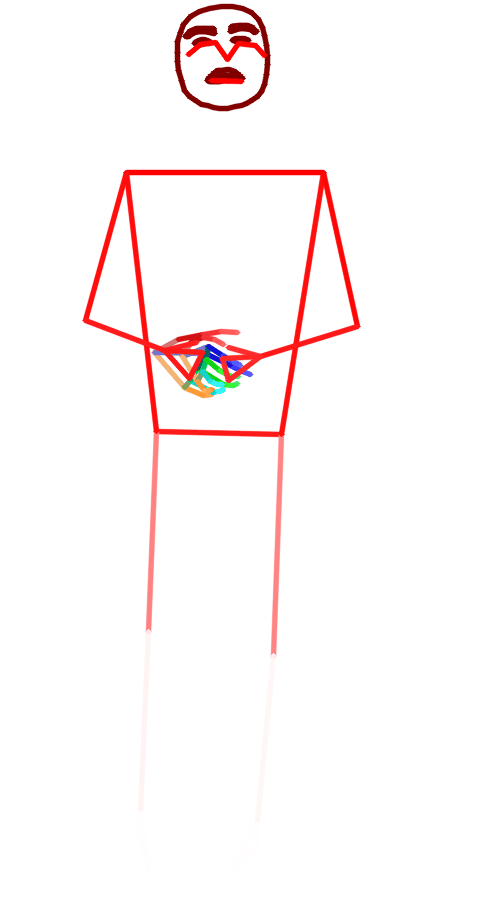

In [ ]:
from IPython.display import Image, display, HTML
import base64

def display_pose_in_notebook(pose: Pose, max_frames: int = 50):
    """
    Display pose directly in Jupyter Notebook as GIF
    """
    pose_copy = pose.copy()
    pose_copy.focus()
    
    visualizer = PoseVisualizer(pose_copy)
    frames = list(visualizer.draw(max_frames=max_frames))
    
    # Create GIF in memory
    gif_bytes = visualizer.save_gif(None, frames)
    
    # Convert to base64 and display
    b64 = base64.b64encode(gif_bytes).decode()
    display(HTML(f'<img src="data:image/gif;base64,{b64}">'))

display_pose_in_notebook(pose)

## 📚 Summary

| Function | Usage |
|--------|-----------|
| `visualizer.save_video()` | Save as MP4 video |
| `visualizer.save_gif()` | Save as animated GIF |
| `visualizer.save_png()` | Save as PNG (supports transparency) |
| `visualizer.save_frame()` | Save single frame |
| `visualizer.draw()` | Draw on colored background |
| `visualizer.draw_on_video()` | Draw on video |

### CLI
```bash
visualize_pose -i input.pose -o output.mp4 --normalize
```

### Next Step
Go to the next Notebook to learn **Advanced Features** like normalization and scaling!